## Import libraries

In [124]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract
import scipy.ndimage
import imutils

User-defined Python file that implements the various Otsu thresholding algorithms

In [125]:
import otsu

User-defined Python file that calculates Word Error Rate (WER)

In [126]:
import wer

## sample01.png

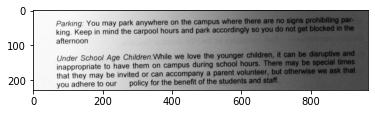

In [127]:
# Read and show image
sample1 = cv2.imread('sample01.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(sample1, cmap = 'gray')

In [5]:
# Tesseract
print(pytesseract.image_to_string(sample1))

Parking: You may park anywhere on the cé
king. Keep in mind the carpool hours and park
afternoon

Under School Age Children:While we love
inappropriate to have them on campus @ J
that they may be invited or can accompany :
you adhere to our _ policy for the benefit of

 



The ground truth text is manually typed out for comparison purposes and is stored in answer01.txt and answer02.txt respectively for sample01.png and sample02.png.

In [6]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer01.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(sample1), answer)))

OCR WER Accuracy: 0.4835164835164835


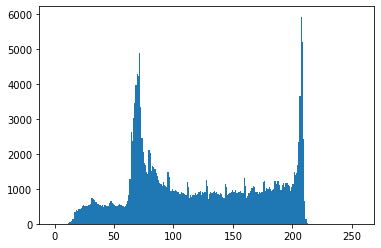

In [7]:
# plot histogram
plt.hist(x = sample1.ravel(),
        bins = 256,
        range = [0, 256])
plt.savefig('output/sample1_hist.png')
plt.show()

## Task 1: Otsu global thresholding algorithm

Implement the Ostu global thresholding algorithm for binarizing the sample text images and feed the binarized images to the OCR software to evaluate the OCR accuracy.

In [8]:
# note: otsu.global_threshold is a user-defined function from otsu.py
threshold = otsu.global_threshold(sample1)

# binarize image
binarized_sample1 = np.where(sample1 > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample1 = binarized_sample1.astype(np.uint8)

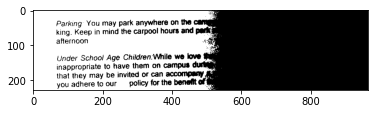

In [9]:
plt.imshow(binarized_sample1, cmap = 'gray')
plt.savefig('output/sample1_binarized.png')

In [10]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample1))

Parking You may park anywhere on the ct
king. Keep in mind the carpool hours and peri
afternoon

Under School Age Children:While we love
inappropriate to have them on campus @ .
that they may be invited or can accompany J
you adhere to our _policy for the benefit of

 



In [11]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer01.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample1), answer)))

OCR WER Accuracy: 0.4725274725274725


## Task 2: Design own algorithms

Design your own algorithms to address the problem of Otsu global thresholding  algorithm, and evaluate OCR accuracy for the binary images as produced by your algorithms. You may explore different approaches such as adaptive thresholding, image enhancement, etc., and the target is to achieve the best OCR accuracy.

We first split the image into segments and perform Otsu algorithm on each segment.

From surface observation of the original image sample01.png, we make a wild guess to implement 2 vertical segments and 3 horizontal segments.

In [128]:
# split image into segments and perform Otsu algorithm on each segment
threshold = otsu.segment_threshold(sample1, 2, 3)

# binarize image
binarized_sample1 = np.where(sample1 > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample1 = binarized_sample1.astype(np.uint8)

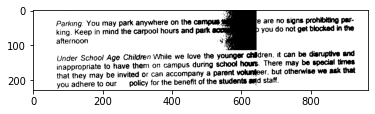

In [129]:
plt.imshow(binarized_sample1, cmap = 'gray')
plt.savefig('output/sample1_segment1.png')

In [130]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample1))

In [131]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer01.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample1), answer)))

OCR WER Accuracy: 0.0


We observe that there is a black vertical line in the middle of the binarized image, which hints that we might need more horizontal segments. We then adjust the number of segments to be 2 vertical segments and 8 horizontal segments to see if it yields better results.

In [16]:
# split image into segments and perform Otsu algorithm on each segment
threshold = otsu.segment_threshold(sample1, 2, 8)

# binarize image
binarized_sample1 = np.where(sample1 > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample1 = binarized_sample1.astype(np.uint8)

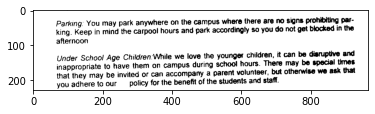

In [17]:
plt.imshow(binarized_sample1, cmap = 'gray')
plt.savefig('output/sample1_segment2.png')

In [18]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample1))

Parking: You may park anywhere on the campus where there are no signs prohibiting par-
king. Keep in mind the carpool hours and park accordingly so you do not get blocked in the
afternoon

Under School Age Children:While we love the younger children, it can be disruptive and
inappropriate to have them on campus during school hours. There may be special times
that they may be invited or can accompany a parent volunteer, but otherwise we ask that
you adhere to our —_ policy for the benefit of the students and staff.



In [19]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer01.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample1), answer)))

OCR WER Accuracy: 0.978021978021978


Note that the actual WER accuracy (based on our manual human eye comparison with the original image) is actually 1.0, except for the '—_policy' portion, which may be caused by the borders of the image or other unknown external reasons. That '—_policy' portion might have caused the OCR WER accuracy to not be 1.0 and 0.989 instead.

In [6]:
# split image into segments and perform Otsu algorithm on each segment
threshold = otsu.segment_threshold(sample1, 2, 12)

# binarize image
binarized_sample1 = np.where(sample1 > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample1 = binarized_sample1.astype(np.uint8)

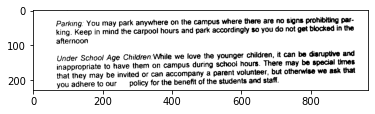

In [7]:
plt.imshow(binarized_sample1, cmap = 'gray')
plt.savefig('output/sample1_segment2.png')

In [8]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample1))

Parking: You may park anywhere on the campus where there are no signs prohibiting par-
king. Keep in mind the carpool hours and park accordingly so you do not get blocked in the
afternoon

Under School Age Children:While we love the younger children, it can be disruptive and
inappropriate to have them on campus during school hours. There may be special times
that they may be invited or can accompany a parent volunteer, but otherwise we ask that
you adhere to our —_ policy for the benefit of the students and staff.



In [9]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer01.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample1), answer)))

OCR WER Accuracy: 0.978021978021978


Note that the binarized image and the OCR WER accuracy is the same. This suggests that there will be no more increase in accuracy even if we continue to adjust the number of segments.

We now implement a sliding window over the image and perform Otsu algorithm on the window.

We use the information from segment thresholding to determine the suitable height and width of our sliding window.

In [24]:
height, width = sample1.shape
seg_height = height // 2 + 1
seg_width = width // 8 + 1

print("Segment height: " + str(seg_height))
print("Segment width: " + str(seg_width))

Segment height: 115
Segment width: 121


In [25]:
# implement sliding window and perform Otsu algorithm on window
threshold = otsu.sliding_window_threshold(sample1, 115, 121, 8, 8)

# binarize image
binarized_sample1 = np.where(sample1 > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample1 = binarized_sample1.astype(np.uint8)

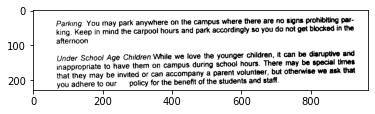

In [26]:
plt.imshow(binarized_sample1, cmap = 'gray')
plt.savefig('output/sample1_window1.png')

In [27]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample1))

Parking: You may park anywhere on the campus where there are no signs prohibiting par-
king. Keep in mind the carpool hours and park accordingly so you do not get blocked in the
afternoon

Under School Age Children:While we love the younger children, it can be disruptive and
inappropriate to have them on campus during school hours. There may be special times
that they may be invited or can accompany a parent volunteer, but otherwise we ask that
you adhere to our —_—policy for the benefit of the students and staff.



In [28]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer01.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample1), answer)))

OCR WER Accuracy: 0.989010989010989


In [29]:
# implement sliding window and perform Otsu algorithm on window
threshold = otsu.sliding_window_threshold(sample1, 115, 121, 24, 24)

# binarize image
binarized_sample1 = np.where(sample1 > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample1 = binarized_sample1.astype(np.uint8)

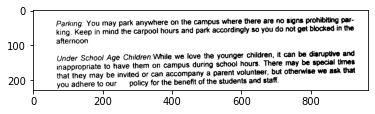

In [30]:
plt.imshow(binarized_sample1, cmap = 'gray')
plt.savefig('output/sample1_window2.png')

In [31]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample1))

Parking: You may park anywhere on the campus where there are no signs prohibiting par-
king. Keep in mind the carpool hours and park accordingly so you do not get blocked in the
afternoon

Under School Age Children:While we love the younger children, it can be disruptive and
inappropriate to have them on campus during school hours. There may be special times
that they may be invited or can accompany a parent volunteer, but otherwise we ask that
you adhere to our _policy for the benefit of the students and staff.



In [32]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer01.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample1), answer)))

OCR WER Accuracy: 0.989010989010989


In [33]:
# implement sliding window and perform Otsu algorithm on window
threshold = otsu.sliding_window_threshold(sample1, 115, 121, 32, 32)

# binarize image
binarized_sample1 = np.where(sample1 > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample1 = binarized_sample1.astype(np.uint8)

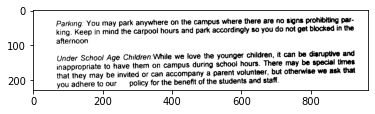

In [34]:
plt.imshow(binarized_sample1, cmap = 'gray')
plt.savefig('output/sample1_window3.png')

In [35]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample1))

Parking: You may park anywhere on the campus where there are no signs prohibiting par-
king. Keep in mind the carpool hours and park accordingly so you do not get blocked in the
afternoon

Under School Age Children:While we love the younger children, it can be disruptive and
inappropriate to have them on campus during school hours. There may be special times
that they may be invited or can accompany a parent volunteer, but otherwise we ask that
you adhere to our —_policy for the benefit of the students and staff.



In [36]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer01.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample1), answer)))

OCR WER Accuracy: 0.989010989010989


## sample02.png

We repeat the same steps as for sample01.png

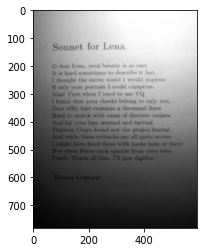

In [133]:
sample2 = cv2.imread('sample02.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(sample2, cmap = 'gray')

In [38]:
# Tesseract
print(pytesseract.image_to_string(sample2))

Sonnet for Lena

 



In [39]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer02.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(sample2), answer)))

OCR WER Accuracy: 0.02586206896551724


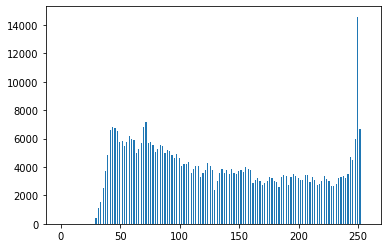

In [40]:
# plot histogram
plt.hist(x = sample2.ravel(),
        bins = 256,
        range = [0, 256])
plt.savefig('output/sample2_hist.png')
plt.show()

## Task 1: Otsu global thresholding algorithm

Implement the Ostu global thresholding algorithm for binarizing the sample text images and feed the binarized images to the OCR software to evaluate the OCR accuracy.

In [41]:
# note: otsu.global_threshold is a user-defined function from otsu.py
threshold = otsu.global_threshold(sample2)

# binarize image
binarized_sample2 = np.where(sample2 > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample2 = binarized_sample2.astype(np.uint8)

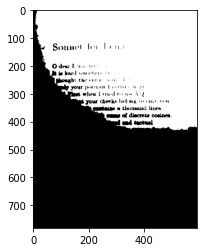

In [42]:
plt.imshow(binarized_sample2, cmap = 'gray')
plt.savefig('output/sample2_binarized.png')

In [43]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample2))

Sonnet for lens

 



In [44]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer02.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample2), answer)))

OCR WER Accuracy: 0.017241379310344827


## Task 2: Design own algorithms

Design your own algorithms to address the problem of Otsu global thresholding  algorithm, and evaluate OCR accuracy for the binary images as produced by your algorithms. You may explore different approaches such as adaptive thresholding, image enhancement, etc., and the target is to achieve the best OCR accuracy.

We first split the image into segments and perform Otsu algorithm on each segment.

From surface observation of the original image sample02.png, we make a wild guess to implement 10 vertical segments and 8 horizontal segments.

In [45]:
# split image into segments and perform Otsu algorithm on each segment
threshold = otsu.segment_threshold(sample2, 10, 8)

# binarize image
binarized_sample2 = np.where(sample2 > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample2 = binarized_sample2.astype(np.uint8)

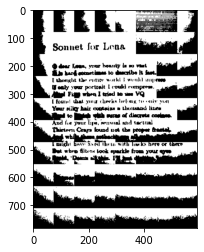

In [46]:
plt.imshow(binarized_sample2, cmap = 'gray')
plt.savefig('output/sample2_segment1.png')

In [47]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample2))

EER.

Sonnet for Lena

 

deer [eus, your heanty ls po vast
hard point imas to dmacribe It iaat,|
I thonght the entice work! F would aipinee
Wealy our portrat [could ramprew.
Aiegl Figg when 1 tried bo use YQ

 

Dfound that ving checks belong to oniy yon
Yeour sility hair couteinn @ thotssod lines Ps
40 [fied ith warns of diacrete conimes.
. And fur your Lipa, sensual and tectuel
i hitter; Crays found wot the proper frastal,
aly

sade 2 Then Sth Tees Aer’ oF
gp Bet when §item look sparkle from your ayes ,
7" ae

 



In [48]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer02.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample2), answer)))

OCR WER Accuracy: 0.23275862068965517


We observe that there are black vertical and horizontal lines in the binarized image, which hints that we might need more segments. We then adjust the number of segments to see if it yields better results.

In [49]:
# split image into segments and perform Otsu algorithm on each segment
threshold = otsu.segment_threshold(sample2, 40, 30)

# binarize image
binarized_sample2 = np.where(sample2 > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample2 = binarized_sample2.astype(np.uint8)

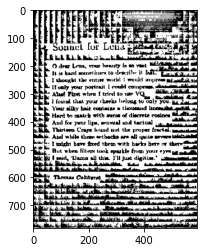

In [50]:
plt.imshow(binarized_sample2, cmap = 'gray')
plt.savefig('output/sample2_segment2.png')

In [51]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample2))

   

TLE 2:

Sonne fur Leua ae

  
    
 

 
 
   

" dear Lena, your beauty Inn vent Ml
* Tt ia hard soinetimes to clescribe it fat
- Pebought Uke entire world 1 would impromeh abate

sahil

Tf galy your portrait | exuld compress. «
Ale Firet when f tried to uae V4

1 found that your cheeks Lelong to only ‘you. te
Your silky bait copteina @ thotussud
Hard to match with wurde of discrete coaines.
And for yur lips, seoal and tectual
f Thirteen Crays found not the proper ape
- And while thre acthacks are all vyclle pevers uate
eek Cf might have fhved them with hacks bere or there ier
3. But when Filter took sparkle from your ee
i saicl, ‘Damo all thie. I'l) give.” nites aia

 



In [52]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer02.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample2), answer)))

OCR WER Accuracy: 0.3793103448275862


In [53]:
# split image into segments and perform Otsu algorithm on each segment
threshold = otsu.segment_threshold(sample2, 45, 35)

# binarize image
binarized_sample2 = np.where(sample2 > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample2 = binarized_sample2.astype(np.uint8)

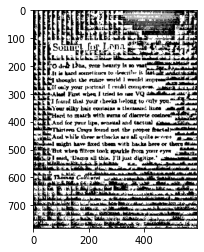

In [54]:
plt.imshow(binarized_sample2, cmap = 'gray')
plt.savefig('output/sample2_segment3.png')

In [55]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample2))

      

rs] was thee penn or bent Into

J ia ard ainelinuca to cdeacribe it 7

1 thought the entire world | erould impreni aman

HW guly your portrait [ rouki compress, PP were

pA bead Firet when J tried ta we ¥Q tld thy

‘gl found that your cheeks belong to Oty you:

i ‘Your silky hair contaias a truissn lines i

TeeHand to match sins ee
vAnd for your lips, seomal and tectual

SThirters Crays found not the preper rectal meiiadiilideiehs
And. while three eethacke ert all quite eecveny eee

d might have fixed tbem with backs here or therg Mitzi

 



In [56]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer02.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample2), answer)))

OCR WER Accuracy: 0.25


Note that any further increase in number of segments does not increase the OCR accuracy. Hence, we deem 40 vertical segments and 30 horizontal segments as optimal.

We now implement a sliding window over the image and perform Otsu algorithm on the window.

Similarly, we will use the information from segment thresholding.

In [57]:
height, width = sample2.shape
seg_height = height // 40 + 1
seg_width = width // 30 + 1

print("Segment height: " + str(seg_height))
print("Segment width: " + str(seg_width))

Segment height: 20
Segment width: 20


In [96]:
# implement sliding window and perform Otsu algorithm on window
threshold = otsu.sliding_window_threshold(sample2, 20, 20, 4, 4)

# binarize image
binarized_sample2 = np.where(sample2 > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample2 = binarized_sample2.astype(np.uint8)

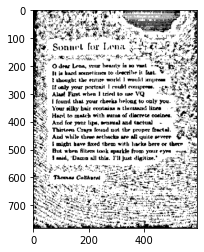

In [97]:
plt.imshow(binarized_sample2, cmap = 'gray')
plt.savefig('output/sample2_window1.png')

In [98]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample2))

ge SSE
your heanty js oo vert
Ht ia bard animetioes to cleecribe it fast.
Pitbought Ube eritire worl | would impress”
Tf only your portrait | could compress,
| Alaa! Fizet when J tried to use VQ
[ found that, your chesis belong te only you.
‘Your silky bait contadinn « Unvisnod lines
Hard to match with sutaa of discrete cosines.

And for your lips, sensual and tactual ~
Thirteen Craya found not the proper fractal.

! Ad while then setbacks ane all quite severe Fig
t might bave fixed them with hacke bere or there
But when Alter: tonk sparkle from your cyra
Yasid, ‘Damo oll this, I'll Just digitize.” 2%

ee

 



In [99]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer02.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample2), answer)))

OCR WER Accuracy: 0.46551724137931033


In [100]:
# implement sliding window and perform Otsu algorithm on window
threshold = otsu.sliding_window_threshold(sample2, 20, 20, 12, 12)

# binarize image
binarized_sample2 = np.where(sample2 > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample2 = binarized_sample2.astype(np.uint8)

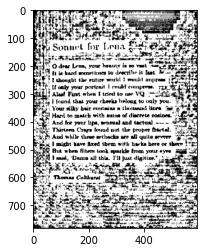

In [101]:
plt.imshow(binarized_sample2, cmap = 'gray')
plt.savefig('output/sample2_window2.png')

In [102]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample2))

    
   
     
  
  
   
     

   

a O dear Lens, your heauty ja eo ae; Se

4 ft is bart conn hines to cleacribe it fast.

a Vr ehonght uhe entire world 1 weuld impr
if Lf only your portrait | could cinpres,

4 Alas! First when [tried to use YQ 2:

1 found that, your cheeks belong te only you.

Your silky bait coutaion a Uhoisand lines “4

 

Thirteen Crays fownd not the proper fractal,
S And while thew setbacks are all quite aevere 9°
a 1 might bave fixed them with backe here or therr
But when Alter took sparkle from your eyes
sais) Sasid, ‘Dasa all :

 

 



In [103]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer02.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample2), answer)))

OCR WER Accuracy: 0.3706896551724138


In [104]:
# implement sliding window and perform Otsu algorithm on window
threshold = otsu.sliding_window_threshold(sample2, 20, 20, 12, 8)

# binarize image
binarized_sample2 = np.where(sample2 > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample2 = binarized_sample2.astype(np.uint8)

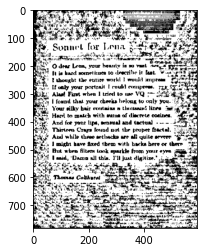

In [105]:
plt.imshow(binarized_sample2, cmap = 'gray')
plt.savefig('output/sample2_window3.png')

In [106]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample2))

fi ia hard sometimes to ceeczibe it fast,
Pebought Ube entire world | would impream |
If only your portrait Traub! compress, ree
Alaa! First when 1 tried to use VQ > 2273
[found that your cheeks belong to only y ‘you.
Your silky bait coutadon a those! lines“
© Hard to match with mums of discrete cosines.

And for your lips, sensual and tactuad - --—
Thirteen Crays fownd not the proper fractal,
And while these setbacks are all quite aercre “9°
‘oc. | might bave fixed them with hacks here or there
But when Aitem took mparkle from your even
. . 1 just digi i

 



In [107]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer02.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample2), answer)))

OCR WER Accuracy: 0.49137931034482757


## Task 3: Optional task

Discuss how to improve recognition algorithms for more robust and accurate character recognition while document images suffer from different types of image degradation.

In this task, we use sample2 as we have already gotten 0.989 accuracy from sample1 using segmented thresholding.

#### Noise Removal

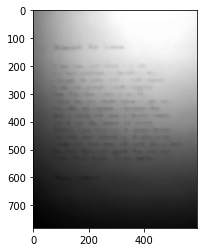

In [88]:
# Median filter
median_img = scipy.ndimage.median_filter(sample2, size=20)
plt.imshow(median_img, cmap = 'gray')
plt.savefig('output/sample2_median.png')

In [89]:
# Tesseract
print(pytesseract.image_to_string(median_img))

In [90]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer02.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(median_img), answer)))

OCR WER Accuracy: 0.0


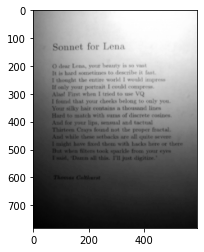

In [80]:
# Gaussian filter
gaussian_img = scipy.ndimage.gaussian_filter(sample2, sigma=0.5)
plt.imshow(gaussian_img, cmap = 'gray')
plt.savefig('output/sample2_gaussian.png')

In [81]:
# Tesseract
print(pytesseract.image_to_string(gaussian_img))

Sonnet for Le:

O dear Lena

VQ
% to only you

 



In [82]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer02.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(gaussian_img), answer)))

OCR WER Accuracy: 0.0603448275862069


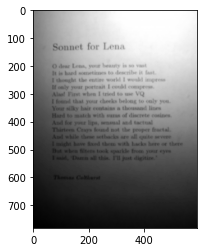

In [108]:
# Gaussian filter
gaussian_img = scipy.ndimage.gaussian_filter(sample2, sigma=1)
plt.imshow(gaussian_img, cmap = 'gray')
plt.savefig('output/sample2_gaussian.png')

In [109]:
# Tesseract
print(pytesseract.image_to_string(gaussian_img))

Sonnet for

© dear Lew

ft the entir
your portrait |
when | tried
Your cheeks belong to only you

f@ thousand lines

 



In [110]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer02.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(gaussian_img), answer)))

OCR WER Accuracy: 0.1206896551724138


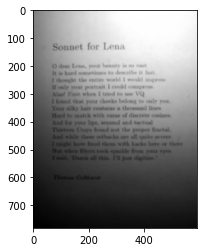

In [137]:
# Gaussian filter
gaussian_img = scipy.ndimage.gaussian_filter(sample2, sigma=1.1)
plt.imshow(gaussian_img, cmap = 'gray')
plt.savefig('output/sample2_gaussian.png')

In [138]:
# Tesseract
print(pytesseract.image_to_string(gaussian_img))

Sonnet {i

 



In [139]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer02.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(gaussian_img), answer)))

OCR WER Accuracy: 0.008620689655172414


Any increase of sigma beyond 1.0 will not yield better results. Hence, we conclude that the optimal sigma is 1.0.

In [146]:
gaussian_img = scipy.ndimage.gaussian_filter(sample2, sigma=0.05)

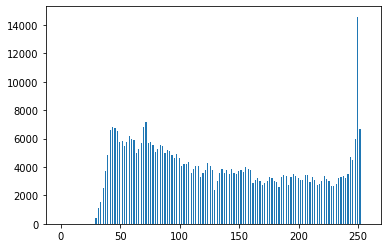

In [151]:
# plot histogram
plt.hist(x = gaussian_img.ravel(),
        bins = 256,
        range = [0, 256])
plt.savefig('output/sample2_gaussian_hist.png')
plt.show()

We use parameters:
- window height: 20
- window width: 20
- vertical step: 12
- horizontal step: 8

which produced the best accuracy previously.

In [147]:
# implement sliding window and perform Otsu algorithm on window
threshold = otsu.sliding_window_threshold(gaussian_img, 20, 20, 12, 8)

# binarize image
binarized_sample2 = np.where(gaussian_img > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample2 = binarized_sample2.astype(np.uint8)

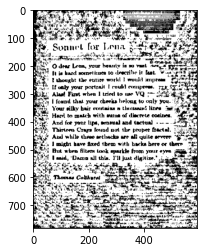

In [148]:
plt.imshow(binarized_sample2, cmap = 'gray')
plt.savefig('output/sample2_gaussian_window.png')

In [149]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample2))

fi ia hard sometimes to ceeczibe it fast,
Pebought Ube entire world | would impream |
If only your portrait Traub! compress, ree
Alaa! First when 1 tried to use VQ > 2273
[found that your cheeks belong to only y ‘you.
Your silky bait coutadon a those! lines“
© Hard to match with mums of discrete cosines.

And for your lips, sensual and tactuad - --—
Thirteen Crays fownd not the proper fractal,
And while these setbacks are all quite aercre “9°
‘oc. | might bave fixed them with hacks here or there
But when Aitem took mparkle from your even
. . 1 just digi i

 



In [150]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer02.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample2), answer)))

OCR WER Accuracy: 0.49137931034482757


#### Image Processing

Dilation and Erosion

In [140]:
kernel = np.ones((2,2), np.uint8)

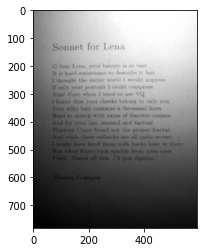

In [141]:
dilation_img = cv2.dilate(sample2, kernel, iterations=1)
plt.imshow(dilation_img, cmap = 'gray')
plt.savefig('output/sample2_dilation.png')

In [142]:
# Tesseract
print(pytesseract.image_to_string(dilation_img))

Sonnet

1 dear Lena

Wi is bard sone
0 the ws
fy your portrait [cor
when | tried to use

 



In [143]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer02.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(dilation_img), answer)))

OCR WER Accuracy: 0.08620689655172414


Rotation

We use sample1 here as sample2 is already straight.

In [117]:
rotated_sample1 = imutils.rotate(sample1, angle=-0.8)

In [118]:
# split image into segments and perform Otsu algorithm on each segment
threshold = otsu.segment_threshold(rotated_sample1, 2, 8)

# binarize image
binarized_sample1 = np.where(rotated_sample1 > threshold, 255, 0)
# convert to be used for Tesseract
binarized_sample1 = binarized_sample1.astype(np.uint8)

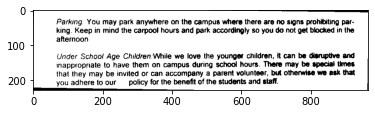

In [119]:
plt.imshow(binarized_sample1, cmap = 'gray')
plt.savefig('output/sample1_rotated.png')

In [120]:
# Tesseract
print(pytesseract.image_to_string(binarized_sample1))

 

Parking: You may park anywhere on the campus where there are no signs prohibiting par-
king. Keep in mind the carpool hours and park accordingly so you do not get blocked in the
afternoon

Under School Age Children:While we love the younger children, it can be disruptive and
inappropriate to have them on campus during school hours. There may be special times
that they may be invited or can accompany a parent volunteer, but otherwise we ask that
you adhere to our _ policy for the benefit of the students and staff.

 



In [123]:
# Evaluate OCR accuracy with Word Error Rate (WER)
f = open("answer01.txt", "r")
answer = f.read()
print('OCR WER Accuracy: ' + 
      str(wer.wer(pytesseract.image_to_string(binarized_sample1), answer)))

OCR WER Accuracy: 1.0
